# Supernova cosmology: theory, data, and simulations

Florent Leclercq,<br/>
Institut d'Astrophysique de Paris,<br/>
florent.leclercq@iap.fr

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
np.random.seed(123456)

In [2]:
plt.rcParams.update({'lines.linewidth': 2})
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': r"\usepackage{amsmath}\usepackage{upgreek}"})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 15})
dir="./plots/Supernova_data_simulations/"
!mkdir -p $dir

## Theory

In [3]:
def mu(z,Omega_m,h):
    return 25. - 5.*np.log10(h) + 5.*np.log10(D_L(z,Omega_m))

def D_L(z,Omega_m):
    return 3000.*(1+z)*(eta(1.,Omega_m) - eta(1/(1.+z),Omega_m))

def eta(a,Omega_m):
    s=((1.-Omega_m)/Omega_m)**(1/3.)
    return 2*np.sqrt(s**3+1.) * (1/a**4 - 0.1540*s/a**3 + 0.4304*s**2/a**2 + 0.19097*s**3/a + 0.066941*s**4)**(-1/8.)

In [4]:
zs=np.linspace(1e-3,2,100)
h=0.7
mus={}
for Omega_m in [0.2,0.3,0.4,0.5]:
    mus[Omega_m]=mu(zs,Omega_m,h)

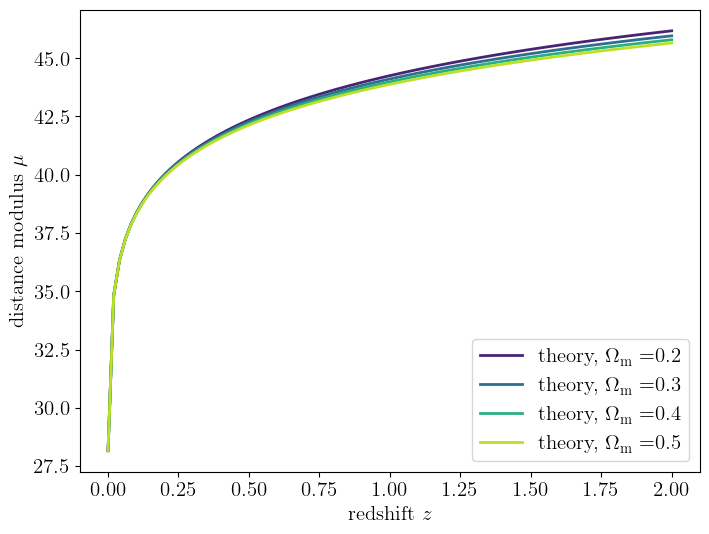

In [5]:
fig, ax = plt.subplots(figsize=(8,6))

ax.set_prop_cycle(cycler('color', plt.cm.viridis(np.linspace(0.1, 0.9, 4))))
for Omega_m in [0.2,0.3,0.4,0.5]:
    ax.plot(zs,mus[Omega_m],label="theory, $\Omega_\mathrm{m}=$"+str(Omega_m))

ax.set_xlabel("redshift $z$")
ax.set_ylabel("distance modulus $\mu$")
ax.legend(loc="lower right")
plt.savefig(dir+'Supernova_theory.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'Supernova_theory.png',dpi=300,bbox_inches="tight")
plt.show()

## Data

In [6]:
data = np.loadtxt("data/jla_mub.txt",unpack=True)

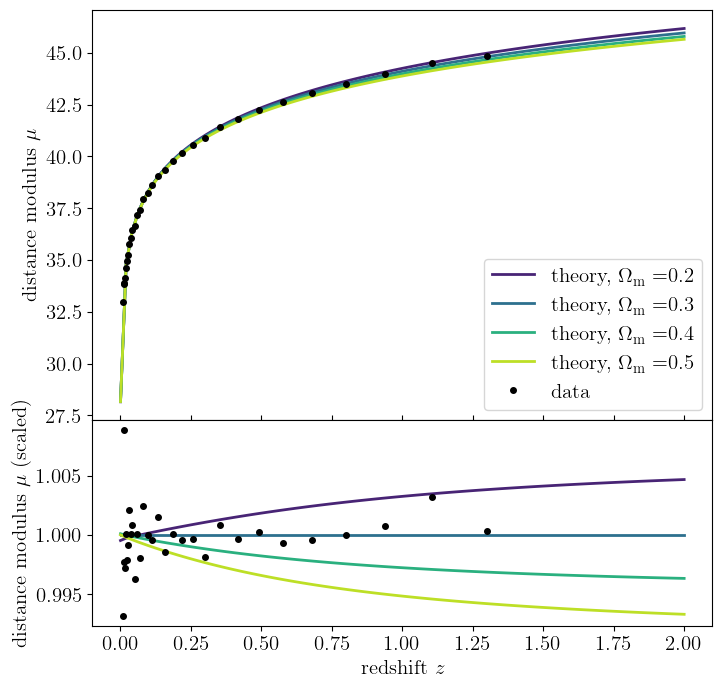

In [7]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(8,8), sharex=True, height_ratios=(1, 0.5))
fig.subplots_adjust(hspace=0.)

ax0.set_prop_cycle(cycler('color', plt.cm.viridis(np.linspace(0.1, 0.9, 4))))
for Omega_m in [0.2,0.3,0.4,0.5]:
    ax0.plot(zs,mus[Omega_m],label="theory, $\Omega_\mathrm{m}=$"+str(Omega_m))
ax0.plot(data[0],data[1],ls="",marker="o",ms=4,color="black",label="data")

ax0.set_ylabel("distance modulus $\mu$")
ax0.legend(loc="lower right")

ax1.set_prop_cycle(cycler('color', plt.cm.viridis(np.linspace(0.1, 0.9, 4))))
for Omega_m in [0.2,0.3,0.4,0.5]:
    ax1.plot(zs,mus[Omega_m]/mus[0.3],label="theory, $\Omega_\mathrm{m}=$"+str(Omega_m))
ax1.plot(data[0],data[1]/mu(data[0],Omega_m=0.3,h=0.7),ls="",marker="o",ms=4,color="black",label="data")
ax1.set_xlabel("redshift $z$")
ax1.set_ylabel("distance modulus $\mu$ (scaled)")
ax1.tick_params(axis='x', which='both', bottom=True, top=True)

plt.savefig(dir+'Supernova_theory_and_data.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'Supernova_theory_and_data.png',dpi=300,bbox_inches="tight")
plt.show()

## Simulated data

In [8]:
nsim=20
zs_sim = np.random.uniform(0.,2.,nsim)
h=0.7
Omega_m=0.3
mus_sim = mu(zs_sim,Omega_m,h)

In [9]:
sigma=0.1
errrors_sim = np.random.normal(0.,sigma,nsim)
mus_sim += errrors_sim

In [10]:
Omega_m=0.3
mus_h={}
for h in [0.6,0.7,0.8]:
    mus_h[h] = mu(zs, Omega_m, h)

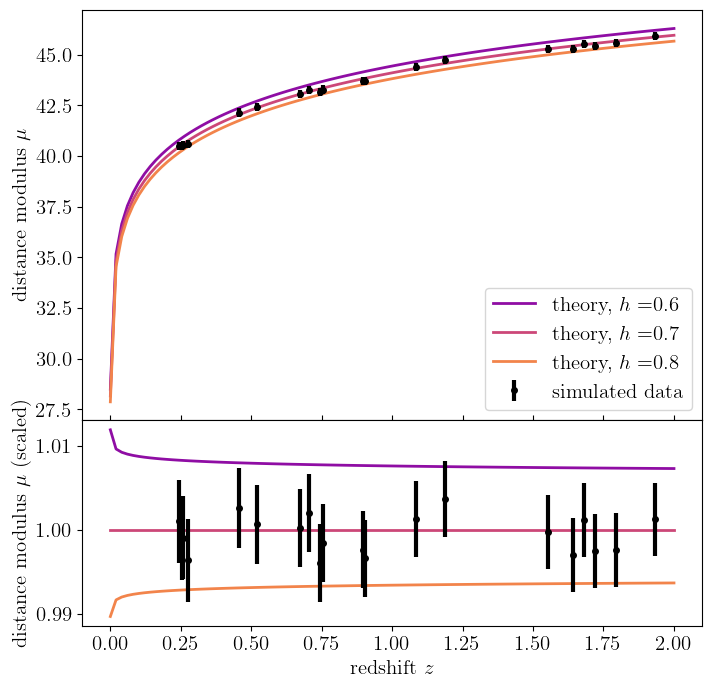

In [11]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(8,8), sharex=True, height_ratios=(1, 0.5))
fig.subplots_adjust(hspace=0.)

ax0.set_prop_cycle(cycler('color', plt.cm.plasma(np.linspace(0.3, 0.7, 3))))
for h in [0.6,0.7,0.8]:
    ax0.plot(zs,mus_h[h],label="theory, $h=$"+str(h))
ax0.errorbar(zs_sim,mus_sim,2*sigma,ls="",lw=3,marker="o",ms=4,color="black",label="simulated data")
ax0.set_ylabel("distance modulus $\mu$")
ax0.legend(loc="lower right")

ax1.set_prop_cycle(cycler('color', plt.cm.plasma(np.linspace(0.3, 0.7, 3))))
for h in [0.6,0.7,0.8]:
    ax1.plot(zs,mus_h[h]/mus_h[0.7],label="theory, $h=$"+str(h))
ax1.errorbar(zs_sim,mus_sim/mu(zs_sim,Omega_m,0.7),2*sigma/mu(zs_sim,Omega_m,0.7),ls="",lw=3,marker="o",ms=4,color="black",label="simulated data")
ax1.set_xlabel("redshift $z$")
ax1.set_ylabel("distance modulus $\mu$ (scaled)")
ax1.tick_params(axis='x', which='both', bottom=True, top=True)

plt.savefig(dir+'Supernova_simulated_data.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig(dir+'Supernova_simulated_data.png',dpi=300,bbox_inches="tight")
plt.show()